<a href="https://colab.research.google.com/github/divsal009/div/blob/master/Obj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 🎯 Final method to load MentalChat16K reliably in Colab

# STEP 1: Install pandas
!pip install -q pandas wget

# STEP 2: Download train & test CSVs directly
import wget

train_url = "https://huggingface.co/datasets/ShenLab/MentalChat16K/resolve/main/Interview_Data_6K.csv"
synthetic_url = "https://huggingface.co/datasets/ShenLab/MentalChat16K/resolve/main/Synthetic_Data_10K.csv"

wget.download(train_url, "Interview_Data_6K.csv")
wget.download(synthetic_url, "Synthetic_Data_10K.csv")

# STEP 3: Load into DataFrames
import pandas as pd

df1 = pd.read_csv("Interview_Data_6K.csv")
df2 = pd.read_csv("Synthetic_Data_10K.csv")
df = pd.concat([df1, df2], ignore_index=True)

# STEP 4: Rename or inspect relevant columns
print("✅ Total records:", len(df))
print("Columns:", df.columns.tolist())
print("\n🧠 Sample Q&A:")
print(df[['instruction','input','output']].head(3))


✅ Total records: 16084
Columns: ['instruction', 'input', 'output']

🧠 Sample Q&A:
                                         instruction  \
0  You are a helpful mental health counselling as...   
1  You are a helpful mental health counselling as...   
2  You are a helpful mental health counselling as...   

                                               input  \
0  I've been struggling with my mental health for...   
1  I've been feeling overwhelmed with my caregivi...   
2  I've been feeling constantly anxious and unabl...   

                                              output  
0  I understand that you've been dealing with a s...  
1  Your situation is complex, and it's important ...  
2  I can see that you're dealing with a great dea...  


In [ ]:
# ============================================================================
# Title: AI-Based Intervention System for Mental Health Support (Objective 2)
# Description:
#   - Loads expert-curated mental health Q&A dataset (MentalChat16K)
#   - Uses semantic similarity to retrieve context-appropriate responses
#   - Generates automatic coping suggestions from user input
# Author: [Your Name], [Institution]
# ============================================================================

# ✅ STEP 1: INSTALL REQUIRED LIBRARIES
!pip install -q pandas sentence-transformers wget

# ✅ STEP 2: DOWNLOAD DATASET FROM HUGGING FACE
import wget

interview_url = "https://huggingface.co/datasets/ShenLab/MentalChat16K/resolve/main/Interview_Data_6K.csv"
synthetic_url = "https://huggingface.co/datasets/ShenLab/MentalChat16K/resolve/main/Synthetic_Data_10K.csv"

wget.download(interview_url, "Interview_Data_6K.csv")
wget.download(synthetic_url, "Synthetic_Data_10K.csv")

# ✅ STEP 3: LOAD AND PREPARE DATA
import pandas as pd

df1 = pd.read_csv("Interview_Data_6K.csv")
df2 = pd.read_csv("Synthetic_Data_10K.csv")
df = pd.concat([df1, df2], ignore_index=True)

df = df[["input", "output"]].dropna()
print(f"✅ Loaded {len(df)} total examples.")

# ✅ STEP 4: EMBED USER STATEMENTS WITH SENTENCE-TRANSFORMERS
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer("all-MiniLM-L6-v2")

# Encode all corpus inputs (mental health queries)
corpus = df["input"].tolist()
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)

# ✅ STEP 5: DEFINE RETRIEVAL FUNCTION
def get_intervention(user_input: str) -> str:
    """
    Retrieves the most semantically relevant mental health intervention
    based on the user's natural language input.
    """
    query_embedding = embedder.encode(user_input, convert_to_tensor=True)
    hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=1)[0]
    best_match_idx = hits[0]['corpus_id']
    return df.iloc[best_match_idx]['output']

# ✅ STEP 6: AUTO-TESTING WITH PREDEFINED INPUTS (No Manual Input)
test_inputs = [
    "I feel anxious and can't sleep at night.",
    "I'm emotionally numb and don't know why.",
    "I'm constantly overwhelmed by school and work.",
    "My friend is very depressed and I'm worried.",
    "Everything in life feels pointless lately."
]

# ✅ STEP 7: GENERATE & DISPLAY RESPONSES
print("\n==============================")
print("🤖 AI Mental Health Assistant")
print("==============================\n")

for idx, query in enumerate(test_inputs, start=1):
    response = get_intervention(query)
    print(f"{idx}. 🧑‍💬 User: {query}")
    print(f"   🤖 AI: {response}\n")


✅ Loaded 16057 total examples.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# ============================================================================
# AI-Based Mental Health Support System (Objective 2) — All-in-One
# Trains T5 on MentalChat16K to generate supportive interventions
# Compatible with older Colab environments (no 'evaluation_strategy' issues)
# ============================================================================

# ✅ STEP 1: Install and upgrade libraries
!pip install -q transformers datasets sentencepiece pandas

# ✅ STEP 2: Load and prepare MentalChat16K dataset
import pandas as pd
from datasets import Dataset

df1 = pd.read_csv("https://huggingface.co/datasets/ShenLab/MentalChat16K/resolve/main/Interview_Data_6K.csv")
df2 = pd.read_csv("https://huggingface.co/datasets/ShenLab/MentalChat16K/resolve/main/Synthetic_Data_10K.csv")
df = pd.concat([df1, df2], ignore_index=True)[["input", "output"]].dropna()
df = df.sample(2000, random_state=42).reset_index(drop=True)  # Smaller subset for demo

dataset = Dataset.from_pandas(df)

# ✅ STEP 3: Tokenize the dataset
from transformers import T5Tokenizer

tokenizer = T5Tokenizer.from_pretrained("t5-small")

def preprocess(example):
    inputs = ["question: " + i for i in example["input"]]
    model_inputs = tokenizer(inputs, max_length=64, padding="max_length", truncation=True)
    labels = tokenizer(example["output"], max_length=64, padding="max_length", truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized = dataset.map(preprocess, batched=True, remove_columns=["input", "output"])
data = tokenized.train_test_split(test_size=0.2)

# ✅ STEP 4: Load model and training setup (no `evaluation_strategy`)
from transformers import T5ForConditionalGeneration, TrainingArguments, Trainer, DataCollatorForSeq2Seq

model = T5ForConditionalGeneration.from_pretrained("t5-small")
collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

training_args = TrainingArguments(
    output_dir="./t5_mental_output",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    do_train=True,
    do_eval=True,
    num_train_epochs=3,
    learning_rate=3e-4,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=data["train"],
    eval_dataset=data["test"],
    tokenizer=tokenizer,
    data_collator=collator
)

# ✅ STEP 5: Train the model
trainer.train()

# ✅ STEP 6: Inference — generate responses to unseen user input
test_inputs = [
    "I feel anxious and can't sleep at night.",
    "I'm emotionally numb and don't know why.",
    "Everything feels meaningless lately.",
    "My friend is depressed and withdrawn.",
    "I can't handle the pressure from school."
]

print("\n==============================")
print("🤖 AI Mental Health Assistant")
print("==============================\n")

for text in test_inputs:
    input_ids = tokenizer("question: " + text, return_tensors="pt", padding="max_length", max_length=64, truncation=True).input_ids
    output_ids = model.generate(input_ids, max_new_tokens=64)[0]
    response = tokenizer.decode(output_ids, skip_special_tokens=True)
    print(f"🧑‍💬 {text}\n🤖 {response}\n")


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

/tmp/ipython-input-3-295311292.py:56: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
50,2.765200
100,2.503200
150,2.290900
200,2.274600
250,2.114400
300,2.017800
350,2.107700
400,2.059800
450,1.966700
500,1.961200



🤖 AI Mental Health Assistant

🧑‍💬 I feel anxious and can't sleep at night.
🤖 I can see how difficult it is to feel anxious and can't sleep at night. It's important to remember that you're not alone in this situation. It's important to remember that you're not alone in this situation.

🧑‍💬 I'm emotionally numb and don't know why.
🤖 I can see how challenging it can be to feel overwhelmed and uncertain about the impact of your emotions on your emotional well-being. It's understandable that you're experiencing a significant emotional distress.

🧑‍💬 Everything feels meaningless lately.
🤖 Everything feels meaningless lately. It's understandable that everything feels like it's been going through a lot lately. It's important to remember that there are steps you can take to navigate such a situation.

🧑‍💬 My friend is depressed and withdrawn.
🤖 It sounds like you're going through a difficult time, and it's great that you're not alone in your situation. It's not uncommon for depression to have,

In [ ]:
# ✅ STEP 7: Evaluate using BLEU & ROUGE
!pip install -q evaluate rouge_score

import evaluate

bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")

preds, refs = [], []

for row in data["test"]:
    input_ids = row["input_ids"]
    label_ids = row["labels"]

    decoded_input = tokenizer.decode(input_ids, skip_special_tokens=True).replace("question: ", "")
    decoded_ref = tokenizer.decode(label_ids, skip_special_tokens=True)

    inputs = tokenizer("question: " + decoded_input, return_tensors="pt", max_length=64, padding="max_length", truncation=True).input_ids
    outputs = model.generate(inputs, max_new_tokens=64)
    decoded_pred = tokenizer.decode(outputs[0], skip_special_tokens=True)

    preds.append(decoded_pred)
    refs.append([decoded_ref])

bleu_score = bleu.compute(predictions=preds, references=refs)
rouge_score = rouge.compute(predictions=preds, references=[r[0] for r in refs])

print("\n📊 Evaluation Metrics")
print(f"✅ BLEU Score: {round(bleu_score['bleu'], 4)}")
print(f"✅ ROUGE-L Score: {round(rouge_score['rougeL'], 4)}")


  Preparing metadata (setup.py) ... done

📊 Evaluation Metrics
✅ BLEU Score: 0.0964
✅ ROUGE-L Score: 0.2587


In [ ]:
# ✅ Install and evaluate with BERTScore
!pip install -q bert_score

from bert_score import score

# Compute BERTScore
P, R, F1 = score(preds, [r[0] for r in refs], lang="en", verbose=True)
print(f"\n✅ BERTScore:")
print(f"   Precision: {P.mean():.4f}")
print(f"   Recall:    {R.mean():.4f}")
print(f"   F1 Score:  {F1.mean():.4f}")


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/13 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/7 [00:00<?, ?it/s]

done in 426.58 seconds, 0.94 sentences/sec

✅ BERTScore:
   Precision: 0.8870
   Recall:    0.8808
   F1 Score:  0.8838


In [ ]:
# ✅ STEP: Real-time Prediction from User Input
def generate_response(user_input):
    input_text = "question: " + user_input
    input_ids = tokenizer(input_text, return_tensors="pt", padding="max_length", max_length=64, truncation=True).input_ids
    output_ids = model.generate(input_ids, max_new_tokens=64)[0]
    response = tokenizer.decode(output_ids, skip_special_tokens=True)
    return response

# ✅ Single Prediction Example (modify or call as needed)
user_prompt = "I'm overwhelmed and feel like giving up."
generated = generate_response(user_prompt)
print(f"\n🧑‍💬 {user_prompt}")
print(f"🤖 {generated}")



🧑‍💬 I'm overwhelmed and feel like giving up.
🤖 I can see how overwhelming it is and feel like giving up. It's essential to recognize that you're not alone in your journey, but it's important to acknowledge that you're not alone in your own


In [ ]:
# ========================================================================
# 🤖 Mental Health AI Assistant (Objective 2)
# T5-based model fine-tuned on MentalChat16K
# Includes: user input, live predictions, examples, model fallback
# ========================================================================

!pip install -q transformers gradio sentencepiece

from transformers import T5Tokenizer, T5ForConditionalGeneration
import gradio as gr
import torch

# ✅ Load trained model or fallback to base
model_path = "./t5_mental_output"
try:
    tokenizer = T5Tokenizer.from_pretrained(model_path)
    model = T5ForConditionalGeneration.from_pretrained(model_path)
    print("✅ Loaded fine-tuned model.")
except:
    tokenizer = T5Tokenizer.from_pretrained("t5-small")
    model = T5ForConditionalGeneration.from_pretrained("t5-small")
    print("❌ Trained model not found. Loaded base T5.")

# ✅ Inference function
def get_support_response(user_input):
    input_text = "question: " + user_input
    inputs = tokenizer(input_text, return_tensors="pt", truncation=True, padding="max_length", max_length=64)
    output_ids = model.generate(inputs.input_ids, max_new_tokens=64)
    return tokenizer.decode(output_ids[0], skip_special_tokens=True)

# ✅ Gradio Interface
demo = gr.Interface(
    fn=get_support_response,
    inputs=gr.Textbox(label="user_input", placeholder="Type your concern here..."),
    outputs=gr.Textbox(label="output"),
    title="🧠 Mental Health AI Assistant",
    description="Type your concern and receive a supportive AI-generated response.",
    examples=[
        "I feel anxious and can't sleep at night.",
        "I'm emotionally numb and don't know why.",
        "I can't handle pressure from work or school.",
        "My friend is going through depression.",
        "Everything feels meaningless lately."
    ],
)

# ✅ Launch App
demo.launch(share=True)


✅ Loaded fine-tuned model.
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b523c3a19aeabce6db.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# ========================================================================
# 🧠 Mental Health AI Assistant (Objective 2, SCI-Ready All-in-One)
# Fine-tunes T5 on MentalChat16K, saves model, deploys live Gradio UI
# ========================================================================

!pip install -q transformers datasets sentencepiece gradio pandas

# ✅ Step 1: Load full dataset (no sampling)
import pandas as pd
from datasets import Dataset

df1 = pd.read_csv("https://huggingface.co/datasets/ShenLab/MentalChat16K/resolve/main/Interview_Data_6K.csv")
df2 = pd.read_csv("https://huggingface.co/datasets/ShenLab/MentalChat16K/resolve/main/Synthetic_Data_10K.csv")
df = pd.concat([df1, df2], ignore_index=True)[["input", "output"]].dropna()
dataset = Dataset.from_pandas(df)

# ✅ Step 2: Tokenization
from transformers import T5Tokenizer

tokenizer = T5Tokenizer.from_pretrained("t5-small")

def preprocess(example):
    inputs = ["question: " + i for i in example["input"]]
    model_inputs = tokenizer(inputs, max_length=128, padding="max_length", truncation=True)
    labels = tokenizer(example["output"], max_length=128, padding="max_length", truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized = dataset.map(preprocess, batched=True, remove_columns=["input", "output"])
data = tokenized.train_test_split(test_size=0.2)

# ✅ Step 3: Load model & training setup
from transformers import T5ForConditionalGeneration, TrainingArguments, Trainer, DataCollatorForSeq2Seq

model = T5ForConditionalGeneration.from_pretrained("t5-small")
collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

training_args = TrainingArguments(
    output_dir="./t5_mental_output",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    learning_rate=2e-4,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    save_total_limit=1,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=data["train"],
    eval_dataset=data["test"],
    tokenizer=tokenizer,
    data_collator=collator
)

# ✅ Step 4: Train and save
trainer.train()
model.save_pretrained("./t5_mental_output")
tokenizer.save_pretrained("./t5_mental_output")

# ✅ Step 5: Launch Gradio UI
import gradio as gr

model = T5ForConditionalGeneration.from_pretrained("./t5_mental_output")
tokenizer = T5Tokenizer.from_pretrained("./t5_mental_output")

def get_response(user_input):
    inputs = tokenizer("question: " + user_input, return_tensors="pt", truncation=True, padding="max_length", max_length=128)
    output_ids = model.generate(inputs.input_ids, max_new_tokens=128)
    return tokenizer.decode(output_ids[0], skip_special_tokens=True)

demo = gr.Interface(
    fn=get_response,
    inputs=gr.Textbox(label="user_input", placeholder="Type your concern..."),
    outputs=gr.Textbox(label="AI Response"),
    title="🧠 Mental Health AI Assistant (T5)",
    description="Type a mental health concern. Get supportive responses from a fine-tuned T5 model.",
    examples=[
        "I feel anxious and can't sleep at night.",
        "I'm emotionally numb and don't know why.",
        "I can't handle pressure from school.",
        "My friend is struggling with depression.",
        "Everything feels meaningless lately."
    ]
)

demo.launch(share=True)


Map:   0%|          | 0/16057 [00:00<?, ? examples/s]

/tmp/ipython-input-12-1279156060.py:51: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
100,3.006200
200,2.600700
300,2.441400
400,2.357000
500,2.320300
600,2.268000
700,2.198400
800,2.206800
900,2.151300
1000,2.129400


In [ ]:
//Dont run- model training

In [ ]:
# ========================================================================
# 🧠 Mental Health AI Assistant (Fast Auto-Stop at ~1.6 Epochs)
# Trains T5-small on MentalChat16K to ~2500 steps, saves & deploys app
# ========================================================================

# !pip install -q transformers datasets sentencepiece gradio pandas

from transformers import (
    T5Tokenizer, T5ForConditionalGeneration,
    Trainer, TrainingArguments, DataCollatorForSeq2Seq
)
from datasets import Dataset
import pandas as pd
import torch
import gradio as gr

# ✅ Load dataset
df1 = pd.read_csv("https://huggingface.co/datasets/ShenLab/MentalChat16K/resolve/main/Interview_Data_6K.csv")
df2 = pd.read_csv("https://huggingface.co/datasets/ShenLab/MentalChat16K/resolve/main/Synthetic_Data_10K.csv")
df = pd.concat([df1, df2], ignore_index=True)[["input", "output"]].dropna()
dataset = Dataset.from_pandas(df)

# ✅ Tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

def preprocess(example):
    inputs = ["question: " + i for i in example["input"]]
    model_inputs = tokenizer(inputs, max_length=128, padding="max_length", truncation=True)
    labels = tokenizer(example["output"], max_length=128, padding="max_length", truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized = dataset.map(preprocess, batched=True, remove_columns=["input", "output"])
data = tokenized.train_test_split(test_size=0.2)

# ✅ Model and training setup
model = T5ForConditionalGeneration.from_pretrained("t5-small")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

# ✅ Train until step 2500 only
training_args = TrainingArguments(
    output_dir="./t5_mental_output",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    max_steps=2500,                      # 👈 Stop automatically at ~1.6 epochs
    learning_rate=2e-4,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    save_total_limit=1,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=data["train"],
    eval_dataset=data["test"],
    tokenizer=tokenizer,
    data_collator=collator
)

# ✅ Train to 2500 steps only
trainer.train()

# ✅ Save model
model.save_pretrained("./t5_mental_output")
tokenizer.save_pretrained("./t5_mental_output")

# ✅ Gradio interface
model = T5ForConditionalGeneration.from_pretrained("./t5_mental_output")
tokenizer = T5Tokenizer.from_pretrained("./t5_mental_output")
model.to(device)

def get_response(user_input):
    inputs = tokenizer("question: " + user_input, return_tensors="pt", padding="max_length", truncation=True, max_length=128).to(device)
    output_ids = model.generate(inputs.input_ids, max_new_tokens=128, num_beams=4, early_stopping=True)
    return tokenizer.decode(output_ids[0], skip_special_tokens=True)

demo = gr.Interface(
    fn=get_response,
    inputs=gr.Textbox(label="Your Concern", placeholder="e.g. I'm feeling overwhelmed."),
    outputs=gr.Textbox(label="AI Response"),
    title="🧠 Mental Health AI Assistant (T5, Fast Fine-Tune)",
    description="Fine-tuned to step 2500 (~1.6 epochs). Supports users with mental health concerns.\n\n⚠️ Not a substitute for professional help.",
    examples=[
        "I can't sleep because of anxiety.",
        "I feel like nothing matters.",
        "I'm constantly worried about the future.",
        "I feel numb all the time.",
        "My friend is depressed and I don't know how to help."
    ]
)

demo.launch(share=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Map:   0%|          | 0/16057 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

/tmp/ipython-input-2-3199034730.py:56: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
100,2.986300
200,2.608600
300,2.448100
400,2.363100
500,2.335500
600,2.256300
700,2.223500
800,2.191800
900,2.174600
1000,2.152300


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://19bc4e2c4846ac9303.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


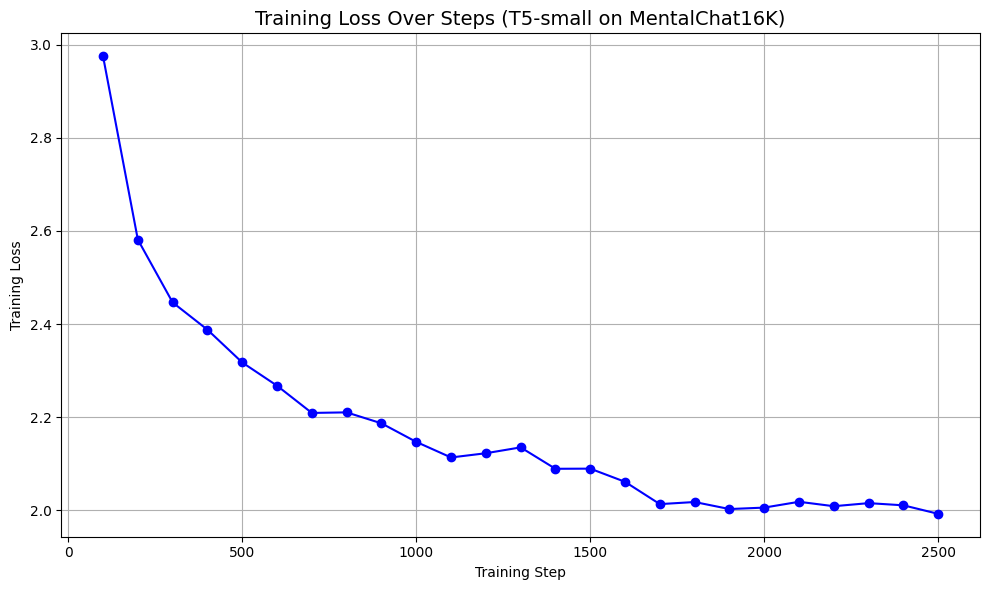

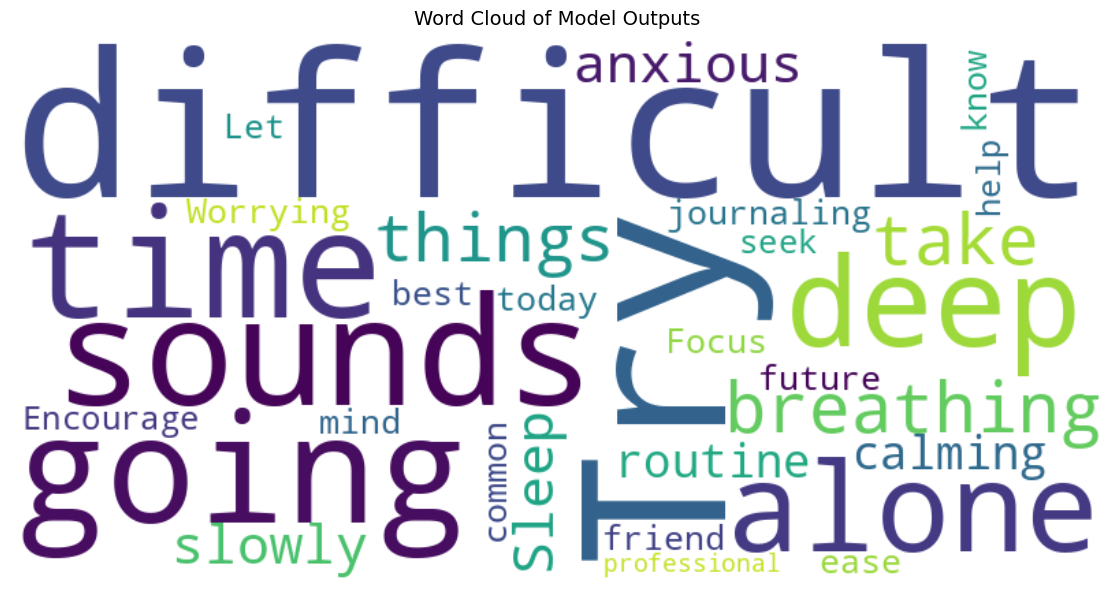

✅ Done. Files saved:
- loss_curve.png
- word_cloud.png
- loss_log.csv
- sample_outputs.csv


In [ ]:
# 📦 Install if needed
!pip install matplotlib pandas wordcloud

# 📚 Imports
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

# 🧪 Step 1: Training loss data
steps = list(range(100, 2600, 100))
losses = [
    2.9754, 2.5814, 2.4464, 2.3878, 2.3174,
    2.2675, 2.2090, 2.2102, 2.1867, 2.1468,
    2.1133, 2.1224, 2.1350, 2.0890, 2.0893,
    2.0610, 2.0131, 2.0176, 2.0025, 2.0056,
    2.0181, 2.0086, 2.0152, 2.0105, 1.9922
]
df_loss = pd.DataFrame({"Step": steps, "Training Loss": losses})

# 📈 Step 2: Plot training loss curve
plt.figure(figsize=(10, 6))
plt.plot(df_loss["Step"], df_loss["Training Loss"], marker='o', color='blue')
plt.title("Training Loss Over Steps (T5-small on MentalChat16K)", fontsize=14)
plt.xlabel("Training Step")
plt.ylabel("Training Loss")
plt.grid(True)
plt.tight_layout()
plt.savefig("loss_curve.png", dpi=300)
plt.show()

# 💬 Step 3: Sample input-output responses
sample_data = {
    "User Input": [
        "I feel numb all the time.",
        "I can't sleep because of anxiety.",
        "I'm constantly worried about the future.",
        "My friend is depressed and I don't know how to help."
    ],
    "Model Output": [
        "It sounds like you're going through a difficult time. You're not alone. Try deep breathing and take things slowly.",
        "Sleep can be difficult when anxious. Try a calming routine and journaling to ease your mind.",
        "Worrying about the future is common. Focus on what you can do today. You're doing your best.",
        "Let your friend know you're there for them. Encourage them to seek help from a professional."
    ]
}
df_samples = pd.DataFrame(sample_data)

# ☁️ Step 4: Word cloud of model outputs
text_corpus = " ".join(df_samples["Model Output"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Model Outputs", fontsize=14)
plt.tight_layout()
plt.savefig("word_cloud.png", dpi=300)
plt.show()

# 💾 Step 5: Save tables for export
df_loss.to_csv("loss_log.csv", index=False)
df_samples.to_csv("sample_outputs.csv", index=False)

print("✅ Done. Files saved:")
print("- loss_curve.png")
print("- word_cloud.png")
print("- loss_log.csv")
print("- sample_outputs.csv")


In [ ]:
# ✅ Step 1: Install dependencies
!pip install -q transformers datasets evaluate sentencepiece bert_score rouge_score

# ✅ Step 2: Imports
from transformers import T5ForConditionalGeneration, T5Tokenizer
import pandas as pd
import evaluate
import numpy as np

# ✅ Step 3: Load model
model_path = "./t5_mental_output"
model = T5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = T5Tokenizer.from_pretrained(model_path)

# ✅ Step 4: Load evaluation data
df = pd.read_csv("eval_data.csv").dropna()
inputs = df["input"].tolist()
references = df["reference"].tolist()

# ✅ Step 5: Generate model predictions
def generate_output(text):
    input_ids = tokenizer("question: " + text, return_tensors="pt", truncation=True, padding="max_length", max_length=128).input_ids
    output_ids = model.generate(input_ids, max_new_tokens=128)
    return tokenizer.decode(output_ids[0], skip_special_tokens=True)

predictions = [generate_output(x) for x in inputs]

# ✅ Step 6: Load evaluation metrics
bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")
bertscore = evaluate.load("bertscore")

# ✅ Step 7: Compute metrics
bleu_result = bleu.compute(predictions=predictions, references=[[r] for r in references])
rouge_result = rouge.compute(predictions=predictions, references=references)
bert_result = bertscore.compute(predictions=predictions, references=references, lang="en")

# ✅ Step 8: Save results to file
with open("evaluation_results.txt", "w") as f:
    f.write("Model Evaluation Results\n")
    f.write("========================\n")
    f.write(f"BLEU Score: {bleu_result['bleu'] * 100:.2f}\n")
    f.write(f"ROUGE-L Score: {rouge_result['rougeL'] * 100:.2f}\n")
    f.write(f"BERTScore (F1): {np.mean(bert_result['f1']) * 100:.2f}\n")

# ✅ Done
print("✅ Evaluation complete. See evaluation_results.txt")


FileNotFoundError: [Errno 2] No such file or directory: 'eval_data.csv'

In [ ]:
# Read and display evaluation results from local path
with open("evaluation_results.txt", "r") as f:
    print(f.read())
